# Pour effectuer ce TME (et les suivants)
- le notebook comment par importer un fichier tme2.py que vous devez créer et dans lequel
vous devez écrire vos fonctions et vos commentaires;
- les lignes autoreload permettent que l'environnement d'exécution du notebook recharge
le fichier tme1.py à chaque modification;
- n'hésitez pas à "restart kernel" de temps en temps et à ré-exécuter l'ensemble du notebook;
- il faudra soumettre uniquement le fichier tme2.py qui contiendra en première ligne les noms
de ses auteurs;
- le fichier pdf fourni contient le notebook version finale (avec tous les résultats demandés).

In [2]:
%load_ext autoreload
%autoreload 2
import tme2

In [3]:
import numpy as np
import math

import matplotlib.pyplot as plt

# MAPSI - TME  - Rappels de Proba/stats

## I- La planche de Galton (<font color="red"> obligatoire</font>)

### I.1- Loi de Bernoulli
Écrire une fonction `bernoulli: float ->int` qui prend en argument la paramètre $p \in [0,1]$ et qui renvoie aléatoirement $0$ (avec la probabilité $1-p$) ou $1$ (avec la probabilité $p$).

In [5]:
# test de la méthode précédente (triviale pour Bernoulli mais utile en général)
print(np.array([tme2.bernoulli(p=0.3) for i in range(300)]).mean()) # moyenne de 300 tirages pour p = 0.3 => ~0.3
print(np.array([tme2.bernoulli(p=0.5) for i in range(300)]).mean()) # moyenne de 300 tirages pour p = 0.5 => ~0.5
print(np.array([tme2.bernoulli(p=1) for i in range(300)]).mean())   # moyenne de 300 tirages pour p = 1   => =1

0.27666666666666667
0.4533333333333333
1.0


### I.2- Loi binomiale
Écrire une fonction `binomiale: int , float -> int` qui prend en argument un entier $n$ et $p \in [0,1]$ et qui renvoie aléatoirement un nimbre tiré selon la distribution ${\cal B}(n,p)$.

In [6]:
# TEST
# espérance = np
print(np.array([tme2.binomiale(n=10,p=0.3) for i in range(300)]).mean()) # moyenne de 300 tirages pour n=10 p = 0.3 => 3
print(np.array([tme2.binomiale(n=20,p=0.3) for i in range(300)]).mean()) # moyenne de 300 tirages pour n=20 p = 0.3 => 6
print(np.array([tme2.binomiale(n=10,p=0.8) for i in range(300)]).mean()) # moyenne de 300 tirages pour n=10 p = 0.8 => 8

2.973333333333333
5.826666666666667
7.973333333333334


### I.3- Histogramme de la loi binomiale
<img src="res/tme2_Galton.jpg" title="Planche de Galton" style="float: right;">

Dans cette question, on considère une planche de Galton de hauteur $n$. On rappelle que des bâtons horizontaux (oranges) sont cloués à cette planche comme le montre la figure ci-contre. 

 Des billes bleues tombent du haut de la planche et, à chaque niveau, se retrouvent à la verticale d'un des bâtons. Elles vont alors tomber soit à gauche, soit à droite du bâton, jusqu'à atteindre le bas de la planche. Ce dernier est constitué de petites boites dont les bords sont symbolisés par les lignes verticales grises. 
 
Chaque boite renferme des billes qui sont passées exactement le même nombre de fois à droite des bâtons oranges. Par exemple, la boite la plus à gauche renferme les billes qui ne sont jamais passées à droite d'un bâton, celle juste à sa droite renferme les billes passées une seule fois à droite d'un bâton et toutes les autres fois à gauche, et ainsi de suite. 

La répartition des billes dans les boites suit donc une loi binomiale ${\cal B}(n,0.5)$. 

Écrire un function galton(l) qui crée un tableau de $l$ cases dont le contenu correspond à $l$ instanciations de la loi binomiale ${\cal B}(n,p)$.

In [7]:
tme2.galton(l=100,n=20,p=0.5)

array([14.,  9., 10.,  9., 12., 12., 12.,  8.,  9.,  8.,  9.,  8., 15.,
        9., 13., 11.,  8., 11., 17.,  9., 12.,  9.,  9.,  6., 11.,  5.,
        6., 14.,  8.,  9.,  7.,  6., 12., 10.,  8., 12., 12., 11.,  8.,
        9.,  8.,  9.,  5., 10.,  8., 11.,  5.,  8.,  9.,  8., 13.,  9.,
       10.,  8., 10.,  8., 11., 12., 12., 11., 10., 13., 10.,  8., 12.,
       10., 12., 12., 11.,  9.,  5.,  6., 12., 13.,  9., 11., 11., 10.,
       16., 11.,  7.,  8.,  7.,  7.,  8.,  7.,  9.,  7.,  8., 11., 11.,
        8., 12.,  8., 11., 12.,  8., 13., 14., 14.])

Afin de voir la répartition des billes dans la planche de Galton, tracer l'histogramme de ce tableau. Vous pourrez utiliser la fonction hist de matplotlib.pyplot: 

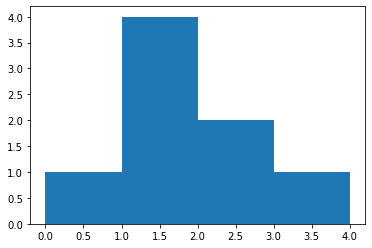

In [12]:
import matplotlib.pyplot as plt

plt.hist ([0,1,2,1,2,4,1,1], 4);

Ecrire la fonction `histo_galton` qui trace l'histogramme de la répartition des billes dans la planche. 
Pour le nombre de bins, calculez le nombre de valeurs différentes dans votre tableau.

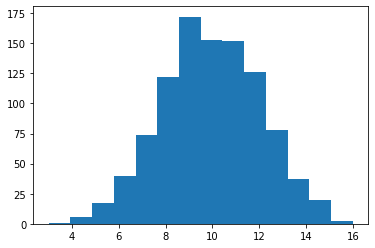

In [16]:
nb_billes = 1000
tme2.histo_galton(l=nb_billes,n = 20,p = 0.5)

## II- Visualisation d'indépendances (<font color="red"> obligatoire</font>)

### II.1- Loi normale centrée réduite
<img src="res/tme2_normale.jpg" title="Planche de Galton" style="float: right;">

On souhaite visualiser la fonction de densité de la loi normale. Pour cela, on va créer un ensemble de $k$ points $(x_i,y_i$), pour des $x_i$ équi-espacés variant de $-2σ$ à $2σ$, les $y_i$ correspondant à la valeur de la fonction de densité de la loi normale centrée de variance $σ^2$, autrement dit ${\cal N}(0,σ^2)$.

Écrire une fonction `normale : int , float -> float np.array` qui, étant donné un paramètre entier `k` impair et un paramètre réel `sigma` renvoie l'`array numpy` des $k$ valeurs $y_i$. Afin que l'`array numpy` soit bien symmétrique, on lèvera une exception si $k$ est pair.

Vérfier la validité de votre fonction en affichant grâce à la fonction plot les points générés dans une figure. 

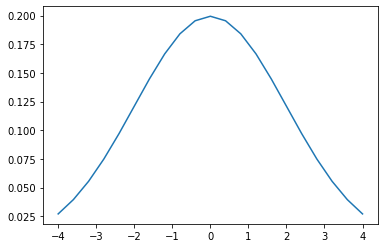

In [44]:
k=21
sigma=2
tme2.normale(k, sigma)
plt.figure()
x, y = tme2.normale(k, sigma)
plt.plot(x, y)
plt.show()
#P2 = tme2.normale ( k, sigma )
# affichage de la loi normale
### entre -2 sigma et 2 sigma
#x=np.linspace ( -2 * sigma, 2 * sigma, k )
### entre 0 et k-1
#x=range(k)
#plt.plot(x,P2,'b-');

### II.2- Distribution de probabilité affine
<img src="res/tme2_lineaire.jpg" title="Distribution affine" style="float: right;">

Dans cette question, on considère une généralisation de la distribution uniforme: une distribution affine, c'est-à-dire que la fonction de densité est une droite, mais pas forcément horizontale, comme le montre la figure ci-contre. 

Écrire une fonction `proba_affine : int , float -> float np.array` qui, comme dans la question précédente, va générer un ensemble de $k$ points $y_i, i=0,...,k−1$, représentant cette distribution (paramétrée par sa pente `slope`). On vérifiera ici aussi que l'entier $k$ est impair. Si la pente est égale à $0$, c'est-à-dire si la distribution est uniforme, chaque point $y_i$ devrait être égal à $\frac{1}{k}$ (afin que $\sum y_i=1$). Si la pente est différente de $0$, il suffit de choisir, $\forall i=0,...,k−1$,

$$y_i=\frac{1}{k}+(i−\frac{k−1}{2})×slope$$

Vous pourrez aisément vérifier que, ici aussi, $\sum y_i=1$. Afin que la distribution soit toujours positive (c'est quand même un minimum pour une distribution de probabilité), il faut que la pente slope ne soit ni trop grande ni trop petite. Le bout de code ci-dessous lèvera une exception si la pente est trop élevée et indiquera la pente maximale possible. 

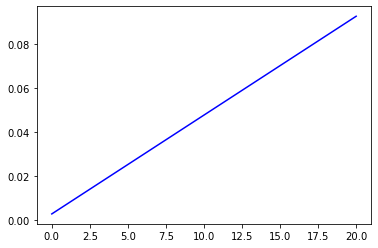

In [129]:
k=21
slop=0.0045
x=range(k)
P1 = tme2.proba_affine( k,0.0045)
plt.plot(x,P1,'b-');

### II.3- Distribution jointe
Écrire une fonction `Pxy : float np.array , float np.array -> float np.2D-array` qui, étant donné deux tableaux numpy de nombres réels à $1$ dimension générés par les fonctions des questions précédentes et représentant deux distributions de probabilités $P(A)$ et $P(B)$, renvoie la distribution jointe $P(A,B)$ sous forme d'un tableau numpy à $2$ dimensions de nombres réels, en supposant que $A$ et $B$ sont des variables aléatoires indépendantes. Par exemple, si:

In [61]:
PA = np.array ( [0.2, 0.7, 0.1] )
PB = np.array ( [0.4, 0.4, 0.2] )

alors `Pxy(A,B)` renverra le tableau :
```
np.array([[ 0.08,  0.08,  0.04],
          [ 0.28,  0.28,  0.14],
          [ 0.04,  0.04,  0.02]])
```

In [100]:
print(tme2.Pxy ( PA, PB ))
print()    
Pprod = tme2.Pxy ( P1, P2 )
print(f"{Pprod.shape=}")

[[0.08, 0.08, 0.04], [0.28, 0.28, 0.14], [0.04, 0.04, 0.02]]



TypeError: type numpy.ndarray doesn't define __round__ method

### II.4- Affichage de la distribution jointe
<img src="res/tme2_jointe.jpg" title="Distribution jointe" style="float: right;">

Le code ci-dessous permet d'afficher en 3D une probabilité jointe générée par la fonction précédente. Exécutez-le avec une probabilité jointe résultant de la combinaison d'une loi normale et d'une distribution affine. 

Si la commande `%matplotlib notebook` fonctione, vous pouvez interagir avec la courbe. Si le contenu de la fenêtre est vide, redimensionnez celle-ci et le contenu devrait apparaître. Cliquez à la souris à l'intérieur de la fenêtre et bougez la souris en gardant le bouton appuyé afin de faire pivoter la courbe. Observez sous différents angles cette courbe. Refaites l'expérience avec une probaiblité jointe résultant de deux lois normales. Essayez de comprendre ce que signifie, visuellement, l'indépendance probabiliste. Vous pouvez également recommencer l'expérience avec le logarithme des lois jointes.


In [91]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# essayer `%matplotlib notebook` pour interagir avec la visualisation 3D

    
def dessine ( ax,P_jointe ):    
    x = np.linspace ( -3, 3, P_jointe.shape[0] )
    y = np.linspace ( -3, 3, P_jointe.shape[1] )
    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, P_jointe, rstride=1, cstride=1 )
    ax.set_xlabel('A')
    ax.set_ylabel('B')
    ax.set_zlabel('P(A) * P(B)')

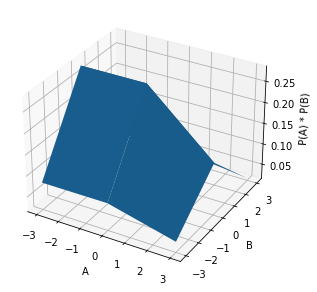

In [95]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
dessine(ax,np.array([[ 0.08,  0.08,  0.04],
                  [ 0.28,  0.28,  0.14],
                  [ 0.04,  0.04,  0.02]]))

TypeError: type numpy.ndarray doesn't define __round__ method

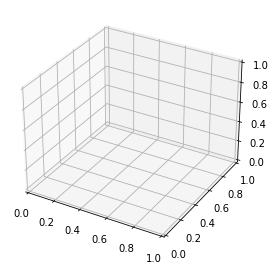

In [101]:
nb_bins = 21
P1 = tme2.proba_affine ( nb_bins,0.004)
P2 = tme2.normale ( nb_bins, 2 )
P3 = tme2.normale ( nb_bins, 6 )

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,3,1, projection='3d')
dessine ( ax,tme2.Pxy (P1,P3) )
ax = fig.add_subplot(1,3,2, projection='3d')
dessine ( ax,tme2.Pxy (P2,P3) )
ax = fig.add_subplot(1,3,3, projection='3d')
dessine ( ax,tme2.Pxy (P2,P1) )

## III- Indépendances conditionnelles (<font color="red"> obligatoire</font>)

Dans cet exercice, on considère quatre variables aléatoires booléennes $X$, $Y$, $Z$ et $T$ ainsi que leur distribution jointe $P(X,Y,Z,T)$ encodée en python de la manière suivante : 

In [13]:
# creation de P(X,Y,Z,T)
P_XYZT = np.array([[[[ 0.0192,  0.1728],
                     [ 0.0384,  0.0096]],

                    [[ 0.0768,  0.0512],
                     [ 0.016 ,  0.016 ]]],

                   [[[ 0.0144,  0.1296],
                     [ 0.0288,  0.0072]],

                    [[ 0.2016,  0.1344],
                     [ 0.042 ,  0.042 ]]]])


Ainsi, $\forall (x,y,z,t) \in \{0,1\}^4$, `P_XYZT[x][y][z][t]` correspond à $P(X=x,Y=y,Z=z,T=t)$ ou, en version abrégée, à $P(x,y,z,t)$. 

### III.1- Indépendance de X et T conditionnellement à (Y,Z)
On souhaite tester si les variables aléatoires $X$ et $T$ sont indépendantes conditionnellement à $(Y,Z)$. Il s'agit donc de vérifer que dans la loi $P$, $$P(X,T|Y,Z)=P(X|Y,Z)\cdot P(T|Y,Z)$$


Pour cela, tout d'abord, écrire une fonction calcXZ qui à partir de `P_XYZT` calcule le tableau `P_YZ` représentant la distribution $P(Y,Z)$. On rappelle que $$P(Y,Z)=\sum_{X,T} P(X,Y,Z,T)$$

Le tableau `P_YZ` est donc un tableau à deux dimensions, dont la première correspond à $Y$ et la deuxième à $Z$. Si vous ne vous êtes pas trompé(e)s, vous devez obtenir le tableau suivant : 
```
np.array([[ 0.336,  0.084],
          [ 0.464,  0.116]])
```

Ainsi $P(Y=0,Z=1)=$ `P_YZ[0][1]` $=0.084$

In [14]:
# calcul de P(Y,Z)
P_YZ = tme2.calcYZ(P_XYZT)
                
print(P_YZ)

[[0.336 0.084]
 [0.464 0.116]]


Ensuite, écrire la fonction calcXTcondY qui calcule le tableau `P_XTcondYZ` représentant la distribution $P(X,T|Y,Z)$. Ce tableau a donc 4 dimensions, chacune correspondant à une des variables aléatoires. De plus, les valeurs de `P_XTcondYZ` sont obtenues en utilisant la formule des probabilités conditionnelles: $$P(X,T|Y,Z)=\frac{P(X,Y,Z,T)}{P(Y,Z)}$$

In [24]:
# calcul de P(X,T | Y,Z) = P(X,Y,Z,T) / P(Y,Z)
P_XTcondYZ=tme2.calcXTcondYZ(P_XYZT)

print(P_XTcondYZ)

[[[[0.05714286 0.51428571]
   [0.45714286 0.11428571]]

  [[0.16551724 0.11034483]
   [0.13793103 0.13793103]]]


 [[[0.04285714 0.38571429]
   [0.34285714 0.08571429]]

  [[0.43448276 0.28965517]
   [0.36206897 0.36206897]]]]


Ecrire la fonction calcX_et_TcondYZ qui, à partir de `P_XTYZ` calcule la paire de tableaux à 3 dimensions `P_XcondYZ` et `P_TcondYZ` représentant respectivement les distributions $P(X|Y,Z)$ et $P(T|Y,Z)$. On rappelle que $$P(X|Y,Z)=∑_T P(X,T|Y,Z)$$

In [34]:
P_XcondYZ,P_TcondYZ = tme2.calcX_etTcondYZ(P_XYZT)
                
print(f"{P_XcondYZ=}")
print()
print(f"{P_TcondYZ=}")

P_XcondYZ=array([[[0.57142857, 0.57142857],
        [0.27586207, 0.27586207]],

       [[0.42857143, 0.42857143],
        [0.72413793, 0.72413793]]])

P_TcondYZ=array([[[0.1, 0.9],
        [0.8, 0.2]],

       [[0.6, 0.4],
        [0.5, 0.5]]])


Enfin, Ecirer une fonction de test testXTindepCondYZ qui vérifie si $X$ et $T$ sont indépendantes conditionnellement à $(Y,Z)$ dans la distribution P_XYZT: si c'est bien le cas, on doit avoir $$P(X,T|Y,Z)=P(X|Y,Z)×P(T|Y,Z)$$ 

(attention, l'égalité numérique est à vérifier à un epsilon près (par exemple epsilon=1e-10))

In [39]:
if tme2.testXTindepCondYZ(P_XYZT,epsilon=1e-10):
    print("X indep T | Y,Z")
else:
    print("X non indep T | Y,Z")

X non indep T | Y,Z


### III.2- Indépendance de X et (Y,Z)

On souhaite maintenant écrire la fonction testXindepYZ qui vérifie si $X$ et $(Y,Z)$ sont indépendantes dans la distribution P_XYZT. 

Pour cela, 

1- commencer par calculer à partir de `P_XYZT` le tableau `P_XYZ` représentant la distribution $P(X,Y,Z)$. 

2- Ensuite, calculer à partir de `P_XYZ` les tableaux `P_X` et `P_YZ` représentant respectivement les distributions $P(X)$ et $P(Y,Z)$. On rappelle que $$P(X)=∑_Y∑_Z P(X,Y,Z)$$

Si vous ne vous êtes pas trompé(e), `P_X` doit être égal au tableau suivant : 
```
np.array([ 0.4,  0.6])
```

3- Enfin, si $X$ et $(Y,Z)$ sont bien indépendantes, on doit avoir $$P(X,Y,Z)=P(X)×P(Y,Z)$$

In [47]:
if tme2.testXindepYZ(P_XYZT,epsilon=1e-10):
    print("X indep Y,Z")
else:
    print("X non indep Y,Z")

X non indep Y,Z


## IV- Indépendances conditionnelles et consommation mémoire  (<font color="red"> obligatoire</font>)

Le but de cet exercice est d'exploiter les probabilités conditionnelles et les indépendances conditionnelles afin de décomposer une probabilité jointe en un produit de "petites probabilités conditionnelles". Cela permet de stocker des probabilités jointes de grandes tailles sur des ordinateurs "standards". Au cours de l'exercice, vous allez donc partir d'une probabilité jointe et, progressivement, construire un programme qui identifie ces indépendances conditionnelles.

Pour simplifier, dans la suite de cet exercice, nous allons considérer un ensemble $X_0,…,X_n$ de variables aléatoires binaires (elles ne peuvent prendre que 2 valeurs : 0 et 1). 

### Simplification du code : utilisation de pyAgrum

Manipuler des probabilités et des opérations sur des probabilités complexes est difficiles avec les outils classiques. La difficulté principale est certainement le problème du mapping entre axe et variable aléatoire. `pyAgrum` propose une gestion de `Potential` qui sont des tableaux multidimensionnels dont les axes sont caractérisés par des variables et sont donc non ambigüs.

Par exemple, après l'initiation du `Potential PABCD` :

In [43]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

X,Y,Z,T=[gum.LabelizedVariable(x,x,2) for x in "XYZT"]
pXYZT=gum.Potential().add(T).add(Z).add(Y).add(X)
pXYZT[:]=[[[[ 0.0192,  0.1728],
            [ 0.0384,  0.0096]],
           [[ 0.0768,  0.0512],
            [ 0.016 ,  0.016 ]]],
          [[[ 0.0144,  0.1296],
            [ 0.0288,  0.0072]],
           [[ 0.2016,  0.1344],
            [ 0.042 ,  0.042 ]]]]

pXYZT

(pyAgrum.Potential<double>@000001EF1F881950) 
                    ||  T                |
Z     |Y     |X     ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.0192  | 0.1728  |
1     |0     |0     || 0.0384  | 0.0096  |
0     |1     |0     || 0.0768  | 0.0512  |
1     |1     |0     || 0.0160  | 0.0160  |
0     |0     |1     || 0.0144  | 0.1296  |
1     |0     |1     || 0.0288  | 0.0072  |
0     |1     |1     || 0.2016  | 0.1344  |
1     |1     |1     || 0.0420  | 0.0420  |

On peut alors utiliser la méthode `margSumOut` qui supprime les variables par sommations: `p.margSumOut(['X','Y'])` correspond à calculer $\sum_{X,Y} p$

La réponse a question III.1 se calcule donc ainsi :

In [45]:
pXT_YZ=pXYZT/pXYZT.margSumOut(['X','T'])
pX_YZ=pXT_YZ.margSumOut(['T'])
pT_YZ=pXT_YZ.margSumOut(['X'])

if pXT_YZ==pX_YZ*pT_YZ:
    print("=> X et T sont indépendants conditionnellement à Y et Z")
else:
    print("=> pas d'indépendance trouvée")


=> X et T sont indépendants conditionnellement à Y et Z


La réponse à la question III.2 se calcule ainsi :

In [48]:
pXYZ=pXYZT.margSumOut("T")
pYZ=pXYZ.margSumOut("X")
pX=pXYZ.margSumOut(["Y","Z"])
if pXYZ==pX*pYZ:
    print("=> X et YZ sont indépendants")
else:
    print("=> pas d'indépendance trouvée")

=> pas d'indépendance trouvée


In [49]:
gnb.sideBySide(pXYZ,pX,pYZ,pX*pYZ,
               captions=['$P(X,Y,Z)$','$P(X)$','$P(Y,Z)$','$P(X)\cdot P(Y,Z)$'])

`asia.txt` contient la description d'une probabilité jointe sur un ensemble de $8$ variables aléatoires binaires (256 paramètres). Le fichier est produit à partir du site web suivant `http://www.bnlearn.com/bnrepository/`.

Le code suivant permet de lire ce fichier et d'en récupérer la probabilité jointe (sous forme d'une `gum.Potential`) qu'il contient : 

In [51]:
def read_file ( filename ):
    """
    Renvoie les variables aléatoires et la probabilité contenues dans le
    fichier dont le nom est passé en argument.
    """
    Pres = gum.Potential ()
    vars=[]

    with open ( filename, 'r' ) as fic:
        # on rajoute les variables dans le potentiel
        nb_vars = int ( fic.readline () )
        for i in range ( nb_vars ):
            name, domsize = fic.readline ().split ()
            vars.append(name)
            variable = gum.LabelizedVariable(name,name,int (domsize))
            Pres.add(variable)

        # on rajoute les valeurs de proba dans le potentiel
        cpt = []
        for line in fic:
            cpt.append ( float(line) )
        Pres.fillWith( cpt )
    return vars,Pres

vars,Pjointe=read_file('res/asia.txt')
# afficher Pjointe est un peu délicat (retire le commentaire de la ligne suivante)
# Pjointe

print('Les variables : '+str(vars))

FileNotFoundError: [Errno 2] No such file or directory: 'res/asia.txt'

In [ ]:
# Noter qu'il existe une fonction margSumIn qui, à l'inverse de MargSumOut, élimine 
# toutes les variables qui ne sont pas dans les arguments
Pjointe.margSumIn(['tuberculosis?','lung_cancer?'])

### IV.1- test d'indépendance conditionnelle

En utilisant la méthode `margSumIn` (voir juste au dessus), écrire une fonction `conditional_indep: Potential,str,str,list[str]->bool` qui rend vrai si dans le `Potential`, on peut lire l'indépendance conditionnelle.

Par exemple, l'appel

`conditional_indep(Pjointe,'bronchitis?', 'positive_Xray?',['tuberculosis?','lung_cancer?'])` 

vérifie si bronchitis est indépendant de `posititve_Xray` conditionnellement à `tuberculosis?` et `lung_cancer?`

D'un point de vue général, on vérifie que $X$ et $Y$ sont indépendants conditionnellement à $Z_1,\cdots,Z_d$ par l'égalité :
$$P(X,Y|Z_1,\cdots,Z_d)=P(X|Z_1,\cdot,Z_d)\cdot P(Y|Z_1,\cdots,Z_d)$$

Ces trois probabilités sont calculables à partir de la loi jointe de $P(X,Y,Z_1,\cdots,Z_d)$.

<em>Remarque</em> Vérifier l'égalité `P==Q` de 2 `Potential` peut être problématique si les 2 sont des résultats de calcul : il peut exister une petite variation. Un meilleur test est de vérifier `(P-Q).abs().max()<epsilon` avec `epsilon` assez petit (par exemple $1e-10$).

In [ ]:
tme2.conditional_indep(Pjointe,
                       'bronchitis?', 
                       'positive_Xray?',
                       ['tuberculosis?','lung_cancer?'],
                       epsilon=1e-10)


In [ ]:
tme2.conditional_indep(Pjointe,
                       'bronchitis?', 
                       'visit_to_Asia?',
                       [],
                       epsilon=1e-10)


### IV.2- Factorisation compacte de loi jointe

On sait que si un ensemble de variables aléatoires ${\cal S} = \{X_{i_0},\ldots,X_{i_{n-1}}\}$ peut être partitionné en deux sous-ensembles $\cal K$ et $\cal L$ (c'est-à-dire tels que ${\cal K} \cap {\cal L} = \emptyset$ et ${\cal K} \cup {\cal L} = \{X_{i_0},\ldots,X_{i_{n-1}}\}$) tels qu'une variable $X_{i_n}$ est indépendante de ${\cal L}$ conditionnellement à ${\cal K}$, alors:

$$P(X_{i_n}|X_{i_0},\ldots,X_{i_{n-1}}) = P(X_{i_n} | {\cal K},{\cal L}) = P(X_{i_n} | {\cal K})$$

C'est ce que nous avons vu au cours n°2 (cf. définition des probabilités conditionnelles). Cette formule est intéressante car elle permet de réduire la taille mémoire consommée pour stocker $P(X_{i_n}|X_{i_0},\ldots,X_{i_{n-1}})$: il suffit en effet de stocker uniquement $P(X_{i_n} | {\cal K})$ pour obtenir la même information.

Écrire une fonction `compact_conditional_proba: Potential,str-> Potential` qui, étant donné une probabilité jointe $P(X_{i_0},\ldots,X_{i_n})$, une variable aléatoire $X_{i_n}$, retourne cette probabilité conditionnelle $P(X_{i_n} | {\cal K})$. Pour cela, nous vous proposons l'algorithme itératif suivant:

```
K=S
Pour tout X in K:
  Si X indépendante de Xin conditionnellement à K\{X) alors
    Supprimer X de K
retourner P(Xin|K)$
```

Trois petites aides :

1- La fonction precédente `conditional_indep` devrait vous servir...

2- Obtenir la liste des noms des variables dans un `Potential` se fait par l'attribut  
```
P.var_names
```

3- Afin que l'affichage soit plus facile à comprendre, il peut être judicieux de placer la variable $X_{i_n}$ en premier dans la liste des variables du Potential, ce que l'on peut faire avec le code suivant : 
```
proba = proba.putFirst(Xin)
```



Le compactage de la loi jointe par rapport à `visit_to_Asia?` doit donner:
<img src="compact_asia.png" title="Distribution compacte">
On voit bien que la cible ne dépend plus de toutes les autres variables

In [ ]:
tme2.compact_conditional_proba(Pjointe,"visit_to_Asia?")

In [ ]:
tme2.compact_conditional_proba(Pjointe,"dyspnoea?")

### IV.3- Création d'un réseau bayésien

Un réseau bayésien est simplement la décomposition d'une distribution de probabilité jointe en un produit de probabilités conditionnelles: vous avez vu en cours que $P(A,B) = P(A|B)P(B)$, et ce quel que soient les ensembles de variables aléatoires disjoints $A$ et $B$. En posant $A = X_n$ et $B = \{X_0,\ldots,X_{n-1}\}$, on obtient donc:

$$P(X_0,\ldots,X_n) = P(X_n | X_0,\ldots,X_{n-1}) P(X_0,\ldots,X_{n-1})$$

On peut réitérer cette opération pour le terme de droite en posant $A = X_{n-1}$ et $B=\{X_0,\ldots,X_{n-2}\}$, et ainsi de suite. Donc, par récurrence, on a:

$$P(X_0,\ldots,X_n) = P(X_0) \times \prod_{i=1}^n P(X_i | X_0,\ldots,X_{i-1} )$$

Si on applique à chaque terme $P(X_i | X_0,\ldots,X_{i-1} )$ la fonction `compact_conditional_proba`, on obtient une décomposition:

$$P(X_0,\ldots,X_n) = P(X_0) \times \prod_{i=1}^n P(X_i | {\cal K_i})$$

avec $K_i \subseteq \{X_0,\ldots,X_{i-1}\}$}. Cette décomposition est dite ''compacte'' car son stockage nécessite en pratique beaucoup moins de mémoire que celui de la distribution jointe. C'est ce que l'on appelle un réseau bayésien.

Écrire une fonction `create_bayesian_network : Potential -> Potential list` qui, étant donné une probabilité jointe, vous renvoie la liste des $P(X_i | {\cal K_i})$. Pour cela, il vous suffit d'appliquer l'algorithme suivant:

```
liste = [] 
P = P(X_0,...,X_n)
Pour i de n à 0 faire:
  calculer Q = compact_conditional_proba(P,X_i)
  afficher la liste des variables de Q
  rajouter Q à liste
  supprimer X_i de P par marginalisation

retourner liste
```

Il est intéressant ici de noter les affichages des variables de Q: comme toutes les variables sont binaires, Q nécessite uniquement (2 puissance le nombre de ces variables) nombres réels. Ainsi une probabilité sur 3 variables ne nécessite que {$2^3=8$} nombres réels. 


In [ ]:
rb = tme2.create_bayesian_network ( Pjointe, 0.001 )
gnb.showPotential(rb[0])
gnb.showPotential(rb[1])
gnb.showPotential(rb[2])

### IV.4- Gain en compression

On souhaite observer le gain en termes de consommation mémoire obtenu par votre décomposition. Si `P` est un `Potential`, alors `P.domainSize()` est égal à la taille (le nombre de paramètres) de la table `P`. 

Ecrire une fonction qui, à partir de la loi jointe, calcule le nombre de paramètre de la loi jointe et le nombre de paramètre dans le réseau bayésien que vous créez grâce à votre fonction `create_bayesian_network`.

In [ ]:
taille_jointe,taille_rb = tme2.calcNbParams(Pjointe)
print(f"{taille_jointe=}   {taille_rb=}")

## V- Applications pratiques (optionnelle)

La technique de décomposition que vous avez vue est effectivement utilisée en pratique. Vous pouvez voir le gain que l'on peut obtenir sur différentes distributions de probabilité du site :

http://www.bnlearn.com/bnrepository/

Cliquez sur le nom du modèle que vous voulez visualiser et téléchargez son .bif ou .dsl. Afin de visualiser le contenu du fichier, vous allez utiliser pyAgrum. Le code suivant vous permettra alors de visualiser votre modèle : la valeur indiquée après "domainSize" est la taille de la probabilité jointe d'origine (en nombre de paramètres) et celle après "dim" est la taille de la probabilité sous forme compacte (somme des tailles des probabilités conditionnelles compactes). 

In [ ]:
# chargement de pyAgrum
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

# chargement du fichier bif ou dsl
bn = gum.loadBN ( "res/asia.bif" )

# affichage de la taille des probabilités jointes compacte (dim) et non compacte (domainSize)
print(bn)

# affichage graphique du réseau bayésien
bn